In [58]:
import pandas as pd

In [60]:
 X = pd.read_csv('C:\\Users\\sulei\\Documents\\csv_files\\NHS_16.csv', header = None ) 

In [6]:
#from sklearn.cross_validation import train_test_split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [65]:
sc = StandardScaler ()

In [12]:
X_train_std = sc.fit_transform(X_train)

In [13]:
X_test_std = sc.fit_transform(X_test)

In [14]:
import numpy as np

In [15]:
cov_mat = np.cov(X_train_std.T)

In [16]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [17]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[8.75242896e+00 2.29140745e+00 1.83048328e+00 1.37164814e+00
 6.58662229e-01 4.44540643e-01 2.21720619e-01 2.03694961e-01
 1.15057508e-01 6.51339108e-02 2.35332565e-02 9.09748007e-03
 1.01019181e-02 4.44734293e-03 1.29663523e-03 2.04016713e-03]


In [18]:
tot = sum(eigen_vals)

In [19]:
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]

In [20]:
cum_var_exp = np.cumsum(var_exp)

In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

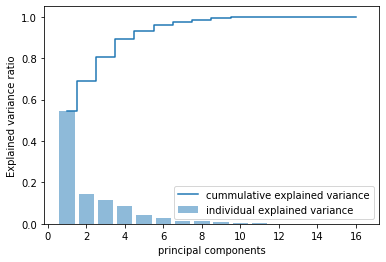

In [31]:
plt.bar(range(1,17), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1,17), cum_var_exp, where='mid',
        label='cummulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.show

In [32]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
              for i in range(len(eigen_vals))]

In [33]:
eigen_pairs.sort(reverse=True)

In [34]:
w=np.hstack((eigen_pairs[0][1][:, np.newaxis],
             eigen_pairs[1][1][:, np.newaxis]))

In [35]:
print ('Matrix W:\n',w)

Matrix W:
 [[-0.3050388  -0.11230939]
 [-0.12480883  0.12967378]
 [-0.29872838 -0.24512286]
 [-0.30011244 -0.23910766]
 [-0.28246566 -0.27345344]
 [-0.26057973 -0.34753405]
 [-0.26694014 -0.3303776 ]
 [ 0.27480267 -0.25586215]
 [-0.04425915  0.38048221]
 [ 0.26146057 -0.26726266]
 [ 0.26198557 -0.26284237]
 [ 0.29547178 -0.18071849]
 [ 0.08150368 -0.30630947]
 [ 0.27209687 -0.17013123]
 [ 0.27457699 -0.17271744]
 [-0.18781154  0.11224686]]


In [36]:
X_train_std[0].dot(w)

array([-2.39517803, -1.1497993 ])

In [37]:
X_train_pca = X_train_std.dot(w)

In [38]:
colors = ['b', 'r']

In [39]:
markers = ['o', 'x']

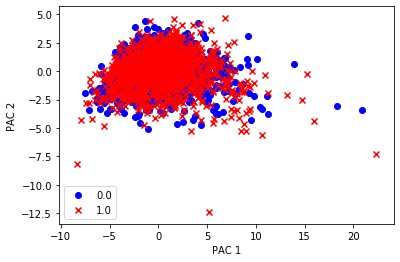

In [41]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
    plt.xlabel('PAC 1')
    plt.ylabel('PAC 2')
    plt.legend(loc='lower left')
    plt.show

In [42]:
from matplotlib.colors import ListedColormap

In [43]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #set marker generator and color map
    markers = ('x','o')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
#lr = LogisticRegression()
lr = SVC(kernel='rbf', C=1.0, gamma=0.1)

In [46]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [47]:
lr.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


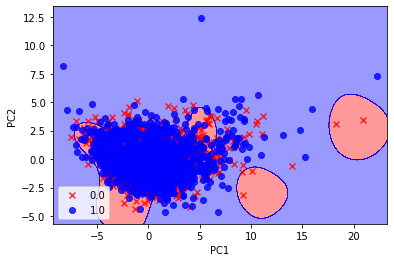

In [48]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


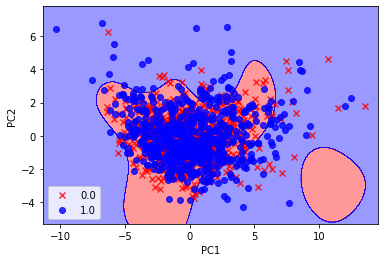

In [49]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [50]:
pca = PCA(n_components=None)

In [51]:
X_train_pca = pca.fit_transform(X_train_std)

In [52]:
pca.explained_variance_ratio_

array([5.46845855e-01, 1.43165591e-01, 1.14367360e-01, 8.56996500e-02,
       4.11527716e-02, 2.77745994e-02, 1.38529546e-02, 1.27267237e-02,
       7.18871544e-03, 4.06952279e-03, 1.47034199e-03, 6.31161025e-04,
       5.68404416e-04, 2.77866985e-04, 1.27468265e-04, 8.10128942e-05])

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [67]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])

In [68]:
from sklearn.model_selection import StratifiedKFold

In [70]:
kfold = StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

In [69]:
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

TypeError: __init__() got an unexpected keyword argument 'y'

In [77]:
kfold = StratifiedKFold(n_splits=2,shuffle=False, random_state=1)

In [78]:
scores = []

In [79]:
for k, (train, test) in enumerate (kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
                                    np.bincount(y_train[train]), score))

TypeError: 'StratifiedKFold' object is not iterable

In [80]:
print ('CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy: 0.571 +/- 0.062


In [132]:
from sklearn.cross_validation import cross_val_score

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [82]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

In [83]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 0.5106383   0.65957447  0.57446809  0.61702128  0.61702128  0.63043478
  0.56521739  0.44444444  0.51111111  0.57777778]


In [84]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy: 0.571 +/- 0.062


In [80]:
from sklearn.learning_curve import learning_curve

ModuleNotFoundError: No module named 'sklearn.learning_curve'

In [133]:
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_score

In [82]:
pipe_lr = Pipeline ([('scl', StandardScaler()),
                    ('clf', LogisticRegression(
                                penalty='l2', random_state=0))])

In [83]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                    X=X_train,
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1.0, 10),
                                                    cv=10,
                                                    n_jobs=1)

C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
train_mean = np.mean(train_scores, axis=1)

In [85]:
train_std = np.std(train_scores, axis=1)

In [86]:
test_mean = np.mean(test_scores, axis=1)

In [87]:
test_std = np.std(test_scores, axis=1)

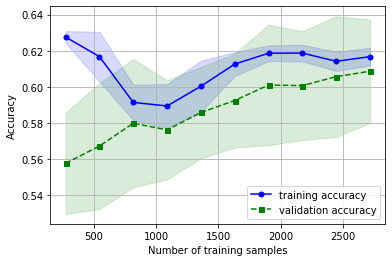

In [91]:
plt.plot(train_sizes, train_mean,
        color='blue', marker='o', markersize=5,
        label='training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--', marker='s', 
        markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [92]:
from sklearn.model_selection import validation_curve

In [102]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [103]:
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train,
                                            y=y_train,
                                            param_name='clf__C',
                                            param_range=param_range,
                                            cv=10)

C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [104]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

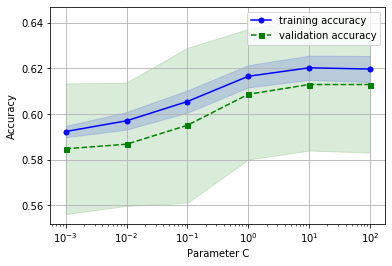

In [118]:
plt.plot(param_range, train_mean,
        color='blue', marker='o', markersize=5,
        label='training accuracy')
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')
plt.plot(param_range, test_mean,
        color='green', linestyle='--', marker='s', 
        markersize=5, label='validation accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.7, 1.0])
plt.show()

In [119]:
#from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [120]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])

In [121]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [122]:
param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
              'clf__gamma': param_range,
              'clf__kernel': ['rbf']}]

In [123]:
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10, n_jobs=-1)

In [124]:
gs = gs.fit(X_train, y_train)

In [125]:
print(gs.best_score_)

0.6579556731723454


In [126]:
print(gs.best_params_)

{'clf__C': 10.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


In [127]:
clf = gs.best_estimator_

In [128]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [129]:
print ('Test Accuracy: %.3f' %clf.score(X_test, y_test))

Test Accuracy: 0.620


In [130]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)

In [134]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [135]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.630 +/- 0.021


In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
gs = GridSearchCV (estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                  scoring ='accuracy', cv=5)

In [138]:
scores = cross_val_score (gs,X_train,y_train,scoring='accuracy',cv=2)

In [139]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.582 +/- 0.013


In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [142]:
y_pred = pipe_svc.predict(X_test)

In [143]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [144]:
print(confmat)

[[531 122]
 [376 267]]


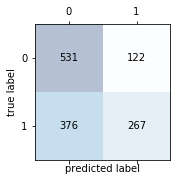

In [149]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range (confmat.shape[0]):
    for j in range (confmat.shape[1]):
        ax.text (x=j, y=i,
        s=confmat[i,j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [150]:
y_pred2 = pipe_svc.predict(X_train)
confmat2 = confusion_matrix(y_true=y_train, y_pred=y_pred2)
print(confmat2)

[[1367  210]
 [ 826  620]]


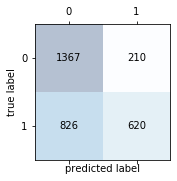

In [153]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range (confmat2.shape[0]):
    for j in range (confmat2.shape[1]):
        ax.text (x=j, y=i,
        s=confmat2[i,j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [155]:
print('Precision: %.3f' %precision_score(y_true=y_test, y_pred=y_pred))

Precision: 0.686


In [156]:
print('Recall: %.3f' %recall_score(y_true=y_test, y_pred=y_pred))

Recall: 0.415


In [157]:
print('F1: %.3f' %f1_score(y_true=y_test, y_pred=y_pred))

F1: 0.517


In [158]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [159]:
pipe_lr = Pipeline([('slc', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

In [160]:
X_train2 = X_train[:, [0,2]]

In [161]:
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [150]:
fig = plt.figure(figsize=(7,5))

In [151]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr  = []

In [152]:
for i, (train, test) in enumerate (cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)'
                                    % (i+1, roc_auc))

In [153]:
plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

In [154]:
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

In [155]:
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area=%0.2f)' % mean_auc, lw=2)

In [140]:
plt.plot ([0,0,1],[0,0,1], lw=2, linestyle=':', color='black', label='perfect performance')

In [156]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristics')
plt.legend(loc="lower right")

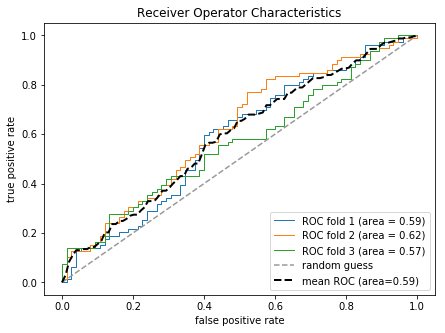

In [157]:
plt.show()

In [158]:
print('Precision: %.3f' %precision_score(y_true=y_train, y_pred=y_pred2))

Precision: 0.743


In [159]:
print('Recall: %.3f' %recall_score(y_true=y_train, y_pred=y_pred2))

Recall: 0.941


In [160]:
print('F1: %.3f' %f1_score(y_true=y_train, y_pred=y_pred2))

F1: 0.831
